In [ ]:
# importing library
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Layer Class
class Layer_Structure:
    def __init__(self, Shape_Input=None, Shape_Output=None, Can_Be_Trained=True):
        self.Shape_Input = Shape_Input
        self.Shape_Output = Shape_Output
        self.Can_Be_Trained = Can_Be_Trained
        self.Input_data = None
        self.Output_data = None
    def Input_Shape(self):
        pass
    def Initializing(self, Initialize_Data):
        pass
    def Forward_Code(self, Input_data):
        raise NotImplementedError
    def Backward_Code(self, Output_data_gradient):
        raise NotImplementedError
    def Update_Code(self, Update_Codes):
        if self.Can_Be_Trained:
            raise NotImplementedError
    def Sigmoid_Code(self, Value_Of_X):
        return 1 / (1 + np.exp(-Value_Of_X))
    def Sigmoid_Code_prime(self, Value_Of_X):
        Temp_Sigmoid_Value = self.Sigmoid_Code(Value_Of_X)
        return Temp_Sigmoid_Value * (1 - Temp_Sigmoid_Value)
    def Tan_Code(self, Value_Of_X):
        return np.tanh(Value_Of_X)
    def Tan_Code_Prime(self, Value_Of_X):
        return 1 - np.power(np.tanh(Value_Of_X), 2)
    def Calling_Code(self, Actual_Label, Predicted_Label):
        raise NotImplementedError
    def Prime_Code(self, Actual_Label, Predicted_Label):
        raise NotImplementedError
    def Set_Layer_Shape(self, Current_Layer_Shape):
        self.Current_Layer_Shape = Current_Layer_Shape
    def Sey_Index_Of_Layer(self, Index_Value):
        self.Index_Value = Index_Value
    def Getting_Shape_io(self):
        return self.Current_Layer_Shape[self.Index_Value]
    def Getting_Function(self):
        return self.Getting_Function(1)[0]
    def Getting_Function(self, *Data_Shape):
        Data_IO = self.Getting_Shape_io()
        Input_data_neurons = np.prod(Data_IO[0])
        return np.random.randn(*Data_Shape) * np.sqrt(1 / Input_data_neurons)
    def Seting_Gradient(self, Gradients_Data):
        raise NotImplementedError
    def Getting_Gradient(self, Iteration_Data):
        raise NotImplementedError

In [ ]:
# optimization Class
class Optimizing_Structure(Layer_Structure):
    def __init__(self, Base_Optimizer_Class_Ins, optimizerArgs, Parameter_Shape):
        self.Collection_Optimizer = [ Base_Optimizer_Class_Ins(**{**optimizerArgs, 'Data_Shape': Data_Shape}) for Data_Shape in Parameter_Shape ]
    def Seting_Gradient(self, Gradients_Data):
        for Loop_Opt, Loop_Grad in zip(self.Collection_Optimizer, Gradients_Data):
            Loop_Opt.Seting_Gradient(Loop_Grad)
    def Getting_Gradient(self, Iteration_Data):
        return [opt.Getting_Gradient(Iteration_Data) for opt in self.Collection_Optimizer]

In [ ]:
# optimization initilization
class Base_Optimization_Class(Layer_Structure):
    def __init__(self, **kwargs):
        self.Gradients_Data = []
        self.Data_Shape = kwargs['Data_Shape']
    def Seting_Gradient(self, Gradients_Data):
        self.Gradients_Data.append(Gradients_Data)
    def Getting_Gradient(self, Iteration_Data):
        Update_Coded_gradients = self.Update_Code(Iteration_Data, np.sum(self.Gradients_Data, axis=0))
        self.Gradients_Data = []
        return Update_Coded_gradients
    def Update_Code(self, Iteration_Data, Gradients_Data):
        raise NotImplementedError

In [ ]:
# activation code
class Activation_Structure(Layer_Structure):
    def __init__(self, Activation_Value, Prime_Activation_Value, **kwargs):
        super().__init__(Can_Be_Trained=False, **kwargs)
        self.Activation_Value = Activation_Value
        self.Prime_Activation_Value = Prime_Activation_Value
    def Forward_Code(self, Input_data):
        self.Input_data = Input_data
        return self.Activation_Value(Input_data)
    def Backward_Code(self, Output_data_gradient):
        return Output_data_gradient * self.Prime_Activation_Value(self.Input_data), None

In [ ]:
# Adding Dense Layers
class Dense_Structure(Layer_Structure):
    def __init__(self, Output_data_size, **kwargs):
        super().__init__(Shape_Output=(1, Output_data_size), **kwargs)
    def Initializing(self, Initialize_Data):
        Input_data_size, Output_data_size = self.Shape_Input[1], self.Shape_Output[1]
        self.Weight_Value = Initialize_Data.Getting_Function(Input_data_size, Output_data_size)
        self.Bias_Value = Initialize_Data.Getting_Function(1, Output_data_size)
        return [(Input_data_size, Output_data_size), (1, Output_data_size)]
    def Forward_Code(self, Input_data):
        self.Input_data = Input_data
        return np.dot(Input_data, self.Weight_Value) + self.Bias_Value
    def Backward_Code(self, Output_data_gradient):
        return np.dot(Output_data_gradient, self.Weight_Value.T), [np.dot(self.Input_data.T, Output_data_gradient), Output_data_gradient]
    def Update_Code(self, Update_Codes):
        self.Weight_Value += Update_Codes[0]
        self.Bias_Value += Update_Codes[1]

In [ ]:
# code to reshape
class Re_Shape_Structure(Layer_Structure):
    def __init__(self, Shape_Output, **kwargs):
        super().__init__(Shape_Output=Shape_Output, Can_Be_Trained=False, **kwargs)
    def Forward_Code(self, Input_data):
        Results = np.reshape(Input_data, self.Shape_Output)
        return Results
    def Backward_Code(self, Output_data_gradient):
        Results = np.reshape(Output_data_gradient, self.Shape_Input), None
        return Results

In [ ]:
# sigmoid class
class Sigmoid_Class(Activation_Structure):
    def __init__(self, **kwargs):
        super().__init__(self.Sigmoid_Code, self.Sigmoid_Code_prime, **kwargs)

In [ ]:
# softmax class
class Softmax_Structure(Layer_Structure):
    def __init__(self, **kwargs):
        super().__init__(Can_Be_Trained=False, **kwargs)
    def Forward_Code(self, Input_data):
        self.Input_data = Input_data
        Temp_Value = np.exp(Input_data)
        self.Output_data = Temp_Value / np.sum(Temp_Value)
        return self.Output_data
    def Backward_Code(self, Output_data_error):
        Input_data_error = np.zeros(Output_data_error.shape)
        Loop_Output = np.tile(self.Output_data.T, Output_data_error.size)
        return self.Output_data * np.dot(Output_data_error, np.identity(Output_data_error.size) - Loop_Output), None

In [ ]:
# tangent class
class Tangent_Structure(Activation_Structure):
    def __init__(self, **kwargs):
        super().__init__(self.Tan_Code, self.Tan_Code_Prime, **kwargs)

In [ ]:
# MSE Class
class MSE_Structure(Layer_Structure):
    def Calling_Code(self, Predicted_Label, Actual_Label):
        return np.mean(np.power(Actual_Label - Predicted_Label, 2))
    def Prime_Code(self, Actual_Label, Predicted_Label):
        return 2 * (Predicted_Label - Actual_Label) / Predicted_Label.size

In [ ]:
# class for entropy loss
class Cross_Entropy_Class(Layer_Structure):
    def __init__(self, Logit_Status=False):
        self.Logit_Status = Logit_Status
    def Calling_Code(self, Actual_Label, Predicted_Label):
        if self.Logit_Status:
            return Actual_Label * -np.log(self.Sigmoid_Code(Predicted_Label)) + (1 - Actual_Label) * -np.log(1 - self.Sigmoid_Code(Predicted_Label))
        else:
            return Actual_Label * -np.log(Predicted_Label) + (1 - Actual_Label) * -np.log(1 - Predicted_Label)
    def Prime_Code(self, Actual_Label, Predicted_Label):
        if self.Logit_Status:
            return Actual_Label * -self.Sigmoid_Code_prime(Predicted_Label) / self.Sigmoid_Code(Predicted_Label) + (1 - Actual_Label) * self.Sigmoid_Code_prime(Predicted_Label) / (1 - self.Sigmoid_Code(Predicted_Label))
        else:
            Temp_Results = Actual_Label * -1 / Predicted_Label + (1 - Actual_Label) / (1 - Predicted_Label)
            return Temp_Results

In [ ]:
# class for momentum 
class Momentum_Structure(Base_Optimization_Class):
    def __init__(self, Learn_Rate=0.01, Value_Mu=0.95, **kwargs):
        super().__init__(**kwargs)
        self.Learn_Rate = Learn_Rate
        self.Value_Mu = Value_Mu
        temp_Cal = np.zeros(self.Data_Shape)
        self.Loop_Value_V = temp_Cal
    def Update_Code(self, Iteration_Data, Weight_Value):
        self.Loop_Value_V = self.Value_Mu * self.Loop_Value_V + self.Learn_Rate * Weight_Value
        Tem_Results = -self.Loop_Value_V
        return Tem_Results

In [ ]:
# SGD Class
class SGD_Structure(Base_Optimization_Class):
    def __init__(self, Learn_Rate=0.01, **kwargs):
        super().__init__(**kwargs)
        self.Learn_Rate = Learn_Rate
    def Update_Code(self, Iteration_Data, Weight_Value):
        return -self.Learn_Rate * Weight_Value

In [ ]:
# main class to run and execute
from keras.datasets import mnist
from keras.utils import np_utils
class Main_Class_Run:
    def create_model(self, network, Initialize_Data, Base_Optimizer_Class_Ins, optimizerArgs={}):
        for Loop_Value_I, Loop_Layer in enumerate(network):
            if not Loop_Layer.Shape_Input:
                Loop_Layer.Shape_Input = network[Loop_Value_I - 1].Shape_Output
            Loop_Layer.Input_Shape()
            if not Loop_Layer.Shape_Output:
                Loop_Layer.Shape_Output = Loop_Layer.Shape_Input
        Current_Layer_Shape = [(Loop_Layer.Shape_Input, Loop_Layer.Shape_Output) for Loop_Layer in network]
        Initialize_Data.Set_Layer_Shape(Current_Layer_Shape)
        Collection_Optimizer = []
        for Loop_Value_I, Loop_Layer in enumerate(network):
            Initialize_Data.Sey_Index_Of_Layer(Loop_Value_I)
            Parameter_Shape = Loop_Layer.Initializing(Initialize_Data)
            Collection_Optimizer.append(Optimizing_Structure(Base_Optimizer_Class_Ins, optimizerArgs, Parameter_Shape) if Loop_Layer.Can_Be_Trained else None)
        Temp_Return = list(zip(network, Collection_Optimizer))
        return Temp_Return
    def Forward_Code(self, Running_Model, Input_data):
        Output_data = Input_data
        for Loop_Layer, Useless_Value in Running_Model:
            Output_data = Loop_Layer.Forward_Code(Output_data)
        Temp_Return = Output_data
        return Temp_Return
    def Backward_Code(self, Running_Model, Output_data):
        Loop_Error_Value = Output_data
        for Loop_Layer, Loop_Opt in reversed(Running_Model):
            Loop_Error_Value, Gradients_Data = Loop_Layer.Backward_Code(Loop_Error_Value)
            if Loop_Layer.Can_Be_Trained:
                Loop_Opt.Seting_Gradient(Gradients_Data)
        return Loop_Error_Value
    def Update_Code(self, Running_Model, Iteration_Data):
        for Loop_Layer, Loop_Opt in Running_Model:
            if Loop_Layer.Can_Be_Trained:
                Loop_Layer.Update_Code(Loop_Opt.Getting_Gradient(Iteration_Data))
    def Train_Function(self, Running_Model, Value_Loss, Feature_Train, label_Train, Feature_Test, Label_Test, epochs, batch=1):
        list_of_error_train = []
        list_of_error_test = []
        Data_Size = len(Feature_Train)
        for Loop_Epoch_Value in range(1, epochs + 1):
            Loop_Error_Value = 0
            for Value_Of_X, y in zip(Feature_Train, label_Train):
                Output_data = self.Forward_Code(Running_Model, Value_Of_X)
                Loop_Error_Value += Value_Loss.Calling_Code(y, Output_data)
                self.Backward_Code(Running_Model, Value_Loss.Prime_Code(y, Output_data))
                if Loop_Epoch_Value % batch == 0:
                    self.Update_Code(Running_Model, Loop_Epoch_Value)
            temp_Cal = Loop_Error_Value / Data_Size
            Loop_Error_Value = temp_Cal
            list_of_error_train.append(Loop_Error_Value)
            Test_Error_Value = self.Test_Function(Running_Model, Value_Loss, Feature_Test, Label_Test)
            list_of_error_test.append(Test_Error_Value)
            Temp_Return = list_of_error_train, list_of_error_test
        return Temp_Return
    def Test_Function(self, Running_Model, Value_Loss, Feature_Test, Label_Test):
        Loop_Error_Value = 0
        for Value_Of_X, y in zip(Feature_Test, Label_Test):
            Output_data = self.Forward_Code(Running_Model, Value_Of_X)
            Temp_Cal = Loop_Error_Value + Value_Loss.Calling_Code(y, Output_data)
            Loop_Error_Value = Temp_Cal
        Loop_Error_Value /= len(Feature_Test)
        return Loop_Error_Value
    def Plot_Graph(self, Train_Error_List, Test_Error_Value):
        plt.plot(range(1, len(Train_Error_List) + 1), Train_Error_List)
        plt.title("Training")
        plt.xlabel("No of Iteration")
        plt.ylabel("Loss Value")
        plt.show()
        plt.plot(range(1, len(Test_Error_Value) + 1 ), Test_Error_Value)
        plt.title("Validation")
        plt.xlabel("No of Iteration")
        plt.ylabel("Loss Value")
        plt.show()
    def Load_Data(self, n):
        (Feature_Train, label_Train), (Feature_Test, Label_Test) = mnist.load_data()
        Feature_Train = Feature_Train.astype('float32')
        Feature_Train /= 255
        label_Train = np_utils.to_categorical(label_Train)
        Feature_Test = Feature_Test.astype('float32')
        Feature_Test /= 255
        Label_Test = np_utils.to_categorical(Label_Test)
        return Feature_Train[:n], label_Train[:n], Feature_Test, Label_Test

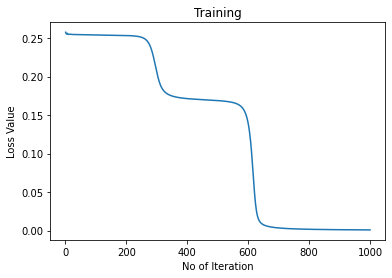

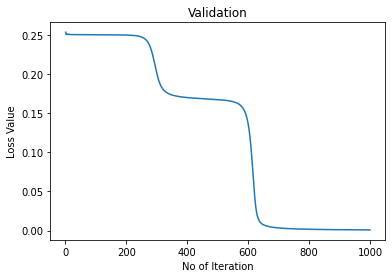

In [ ]:
# Run 1
Features = np.reshape([[0, 0], [0, 1], [1, 0], [1, 1]], (4, 1, 2))
Labels = np.reshape([[0], [1], [1], [0]], (4, 1, 1))
NN_Object = Main_Class_Run()
Running_Model = NN_Object.create_model([ Dense_Structure(3, Shape_Input=(1, 2)), Sigmoid_Class(), Dense_Structure(2), Sigmoid_Class(), Dense_Structure(1), Sigmoid_Class()], Layer_Structure(), Momentum_Structure, {'Learn_Rate': 0.1})
M_S_E_Object = MSE_Structure()
Train_Error_List, Test_Error_Value = NN_Object.Train_Function(Running_Model, M_S_E_Object, Features, Labels, Features, Labels, epochs = 1000)
NN_Object.Plot_Graph(Train_Error_List, Test_Error_Value)

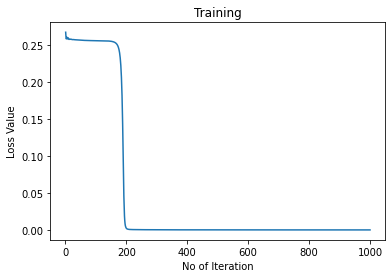

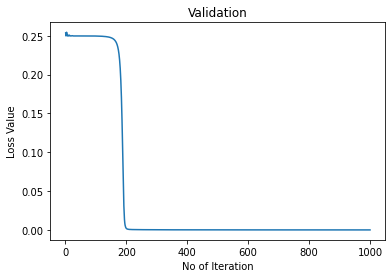

"\n-> Code to dump data\nimport pickle\npickle.dump(main_class_object, open('test.pkl', 'wb'))\n"

In [ ]:
# Run 2
NN_Object = Main_Class_Run()
Running_Model = NN_Object.create_model([ Dense_Structure(3, Shape_Input=(1, 2)), Sigmoid_Class(), Dense_Structure(2), Tangent_Structure(), Dense_Structure(1), Sigmoid_Class()], Layer_Structure(), Momentum_Structure, {'Learn_Rate': 0.1})
M_S_E_Object = MSE_Structure()
Train_Error_List, Test_Error_Value = NN_Object.Train_Function(Running_Model, M_S_E_Object, Features, Labels, Features, Labels, epochs = 1000)
NN_Object.Plot_Graph(Train_Error_List, Test_Error_Value)

"""
-> Code to dump data
import pickle
pickle.dump(NN_Object, open('test.pkl', 'wb'))
"""

11490434/11490434 [==============================] - 0s 0us/step


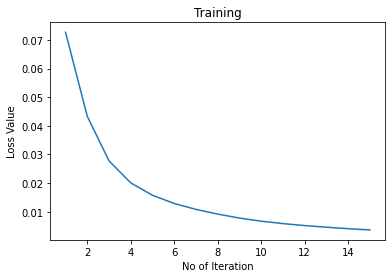

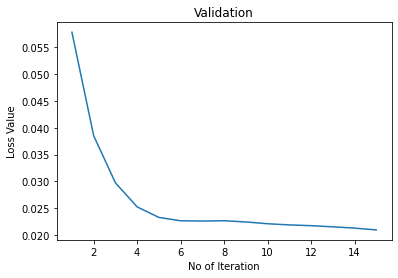

 Testing Dataset : 0.02094569224609447


In [ ]:
# Run 3
NN_Object = Main_Class_Run()
Running_Model = NN_Object.create_model([Re_Shape_Structure((1, 784), Shape_Input=(28, 28)), Dense_Structure(50), Tangent_Structure(), Dense_Structure(20), Tangent_Structure(), Dense_Structure(10), Softmax_Structure()], Layer_Structure(), SGD_Structure, {'Learn_Rate': 0.1})
M_S_E_Object = MSE_Structure()
Feature_Train, label_Train, Feature_Test, Label_Test = NN_Object.Load_Data(1000)
Train_Error_List, Test_Error_Value = NN_Object.Train_Function(Running_Model, M_S_E_Object, Feature_Train, label_Train, Feature_Test, Label_Test, epochs=15)
NN_Object.Plot_Graph(Train_Error_List, Test_Error_Value)
print(" Testing Dataset :", NN_Object.Test_Function(Running_Model, M_S_E_Object, Feature_Test, Label_Test))

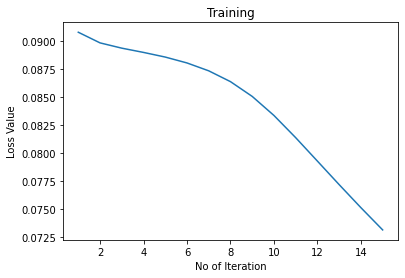

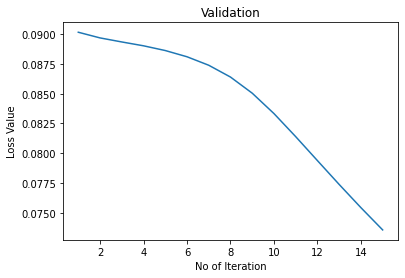

Testing Dataset : 0.07355611735341205


In [ ]:
# Run 4
NN_Object = Main_Class_Run()
Running_Model = NN_Object.create_model([Re_Shape_Structure((1, 784), Shape_Input=(28, 28)), Dense_Structure(50), Sigmoid_Class(), Dense_Structure(20), Sigmoid_Class(), Dense_Structure(10), Softmax_Structure()], Layer_Structure(), SGD_Structure, {'Learn_Rate': 0.1})
M_S_E_Object = MSE_Structure()
Feature_Train, label_Train, Feature_Test, Label_Test = NN_Object.Load_Data(1000)
Train_Error_List, Test_Error_Value = NN_Object.Train_Function(Running_Model, M_S_E_Object, Feature_Train, label_Train, Feature_Test, Label_Test, epochs=15)
NN_Object.Plot_Graph(Train_Error_List, Test_Error_Value)
print("Testing Dataset :", NN_Object.Test_Function(Running_Model, M_S_E_Object, Feature_Test, Label_Test))

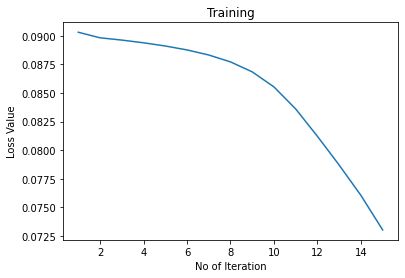

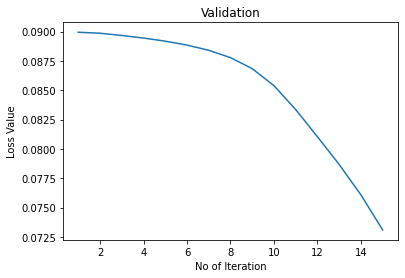

Testing Dataset : 0.07309299602827371


In [ ]:
# Run 4
NN_Object = Main_Class_Run()
Running_Model = NN_Object.create_model([Re_Shape_Structure((1, 784), Shape_Input=(28, 28)), Dense_Structure(100), Sigmoid_Class(), Dense_Structure(50), Sigmoid_Class(), Dense_Structure(10), Softmax_Structure()], Layer_Structure(), SGD_Structure, {'Learn_Rate': 0.1})
M_S_E_Object = MSE_Structure()
Feature_Train, label_Train, Feature_Test, Label_Test = NN_Object.Load_Data(1000)
Train_Error_List, Test_Error_Value = NN_Object.Train_Function(Running_Model, M_S_E_Object, Feature_Train, label_Train, Feature_Test, Label_Test, epochs=15)
NN_Object.Plot_Graph(Train_Error_List, Test_Error_Value)
print("Testing Dataset :", NN_Object.Test_Function(Running_Model, M_S_E_Object, Feature_Test, Label_Test))